In [1]:
# Import pandas and numpy libraries for Data Analysis
# Read the data file which is an excel file.
# This data file contains dump of 6 months of Timsheet data for CapEx/OpEx Analysis in Scaled Agile Framework 

import pandas as pd
import numpy  as np

# Read the data file from the "data" folder placed inside project direcrtory 

timesheet = pd.read_excel('data/ResourcesTimsheet.xlsx')


#Display top 2 rows of data sheet

timesheet.head(5)



,End Date,ID,Rpt Dt,ACTIVITY_DESCR,Quantity,Billing Action,Category
0,2018-12-09,10533,2018-12-03,OpEx-Analysis,2.0,B,T&MON
1,2018-12-09,10533,2018-12-03,CapEx-Design,4.0,B,T&MON
2,2018-12-09,10533,2018-12-03,CapEx-Development,2.0,B,T&MON
3,2018-12-09,10533,2018-12-04,OpEx-Analysis,2.0,B,T&MON
4,2018-12-09,10533,2018-12-04,CapEx-Design,4.0,B,T&MON


In [2]:
# Display total number of Rows and Columns in datasheet

timesheet.shape


(5954, 7)

In [3]:
# Rename the columns (all in lower case) which clearly describes the metadata 

timesheet_cols = ['end_date','emp_id','reporting_date','activity_description','billed_hours','billing_action','category']
timesheet.columns = timesheet_cols

# Rename the columns while reading the file

timesheet = pd.read_excel('data/ResourcesTimsheet.xlsx', names=timesheet_cols, header =0)


#Read the top 2 rows with new columns

timesheet.head(5)



,end_date,emp_id,reporting_date,activity_description,billed_hours,billing_action,category
0,2018-12-09,10533,2018-12-03,OpEx-Analysis,2.0,B,T&MON
1,2018-12-09,10533,2018-12-03,CapEx-Design,4.0,B,T&MON
2,2018-12-09,10533,2018-12-03,CapEx-Development,2.0,B,T&MON
3,2018-12-09,10533,2018-12-04,OpEx-Analysis,2.0,B,T&MON
4,2018-12-09,10533,2018-12-04,CapEx-Design,4.0,B,T&MON


In [4]:
# Explore the data for billed hours against each Activities 

timesheet.groupby('activity_description').billed_hours.describe()

,count,mean,std,min,25%,50%,75%,max
activity_description,,,,,,,,
CapEx-Deployment,171.0,6.476608,2.922687,2.0,4.0,8.0,8.5,11.25
CapEx-Design,1152.0,3.975694,2.170676,1.0,2.0,4.0,5.0,8.00
CapEx-Development,1227.0,3.795436,1.813412,1.0,2.0,4.0,5.0,8.00
CapEx-Testing,1052.0,2.884981,1.548174,1.0,2.0,2.0,4.0,8.00
OpEx-Analysis,1504.0,2.700133,1.282919,1.0,2.0,2.0,4.0,8.00
OpEx-Data Migration,99.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.00
OpEx-Project Administration,622.0,4.030547,2.942394,1.0,1.0,4.0,8.0,8.00
OpEx-Stabilization,97.0,3.680412,1.840213,1.0,2.0,4.0,5.0,8.00
OpEx-Training,21.0,8.500000,1.341641,4.0,8.0,9.0,9.0,10.00


In [5]:
# Sum of "billed hours" for each activity logged in by resources
timesheet.groupby('activity_description').billed_hours.sum()

activity_description
CapEx-Deployment               1107.5
CapEx-Design                   4580.0
CapEx-Development              4657.0
CapEx-Testing                  3035.0
OpEx-Analysis                  4061.0
OpEx-Data Migration             198.0
OpEx-Project Administration    2507.0
OpEx-Stabilization              357.0
OpEx-Training                   178.5
Other Activities                 72.0
Name: billed_hours, dtype: float64

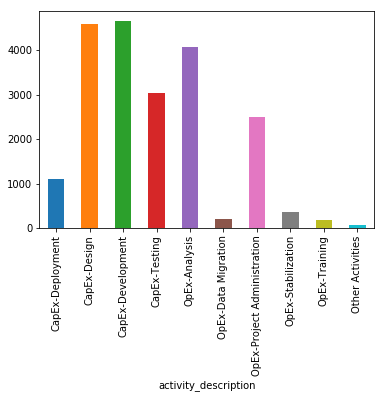

In [12]:
# Draw a bar graph for sum of activities vs hours
timesheet.groupby('activity_description').billed_hours.sum().plot(kind='bar')

In [7]:
#Mean of "billed hours" against each activity for the resources
timesheet.groupby('activity_description').billed_hours.mean()

activity_description
CapEx-Deployment               6.476608
CapEx-Design                   3.975694
CapEx-Development              3.795436
CapEx-Testing                  2.884981
OpEx-Analysis                  2.700133
OpEx-Data Migration            2.000000
OpEx-Project Administration    4.030547
OpEx-Stabilization             3.680412
OpEx-Training                  8.500000
Other Activities               8.000000
Name: billed_hours, dtype: float64

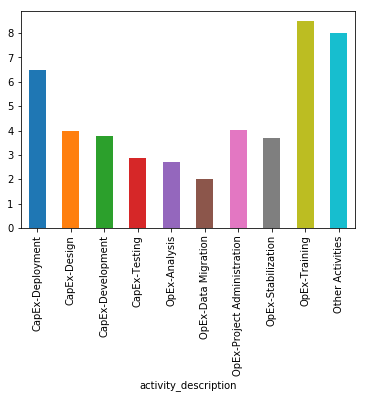

In [8]:
# Draw a bar graph for mean of activities vs hours
timesheet.groupby('activity_description').billed_hours.mean().plot(kind='bar')

In [11]:
# Let us group the data into two categories i.e, "emp_id" and "activity_description"
# The purpose of grouping the data set into two fields is to analyse data against each resource

groupby_EmpID_ActDescr = timesheet.groupby(['emp_id','activity_description']).billed_hours.sum()
groupby_EmpID_ActDescr.head(10)

emp_id  activity_description       
1425    CapEx-Design                   824.0
4461    CapEx-Testing                  504.0
        OpEx-Analysis                  288.0
7147    CapEx-Design                   198.0
        CapEx-Development              198.0
        CapEx-Testing                  198.0
        OpEx-Analysis                   99.0
        OpEx-Project Administration     99.0
        OpEx-Training                   32.0
        Other Activities                32.0
Name: billed_hours, dtype: float64

In [15]:
# Pivot a level of the column labels using unstack() corresponding to each ID
# Inorder to compare aggregates in terms of categorical data columns values (CapEx and OpEx)

groupby_EmpID_ActDescr.unstack().fillna(0)


activity_description,CapEx-Deployment,CapEx-Design,CapEx-Development,CapEx-Testing,OpEx-Analysis,OpEx-Data Migration,OpEx-Project Administration,OpEx-Stabilization,OpEx-Training,Other Activities
emp_id,,,,,,,,,,
1425,0.0,824.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4461,0.0,0.0,0.0,504.0,288.0,0.0,0.0,0.0,0.0,0.0
7147,0.0,198.0,198.0,198.0,99.0,0.0,99.0,0.0,32.0,32.0
7452,0.0,0.0,546.0,197.0,89.0,0.0,8.0,0.0,0.0,0.0
8011,0.0,444.0,198.0,0.0,0.0,198.0,0.0,0.0,0.0,0.0
8043,0.0,0.0,0.0,0.0,0.0,0.0,704.0,0.0,0.0,0.0
8073,0.0,408.0,0.0,0.0,408.0,0.0,0.0,0.0,0.0,0.0
8256,0.0,674.0,0.0,0.0,0.0,0.0,86.0,64.0,0.0,0.0
8926,0.0,0.0,0.0,0.0,0.0,0.0,398.0,0.0,0.0,0.0


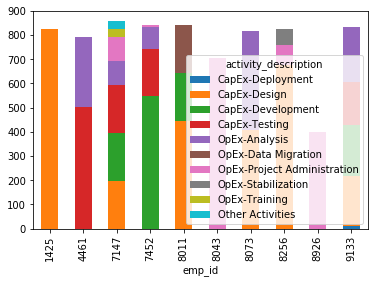

In [16]:
# Draw a bar graph for sum of activities vs hours
groupby_EmpID_ActDescr.unstack().fillna(0).head(10).plot.bar(stacked = True)

sum     13379.500000
mean      247.768519
Name: billed_hours, dtype: float64
sum     7301.5000
mean     182.5375
Name: billed_hours, dtype: float64


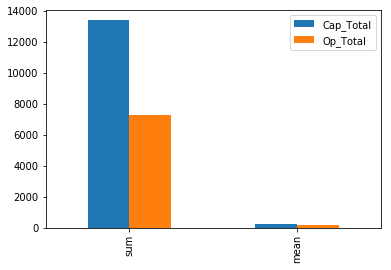

In [20]:
# The dataset has been grouped[by emp_id and activity_description] and pivoted for categorical analysis
# Let's have aggregates for activities under CapEx and OpEx belt. 


CapEx_Total = groupby_EmpID_ActDescr.loc[:, 'CapEx-Deployment' :'CapEx-Testing'].agg(['sum','mean'])
print(CapEx_Total)

OpEx_Total = groupby_EmpID_ActDescr.loc[:, 'OpEx-Analysis' :'OpEx-Training'].agg(['sum','mean'])
print(OpEx_Total)

df = pd.DataFrame({'Cap_Total': CapEx_Total, 'Op_Total': OpEx_Total})
ax = df.plot.bar()





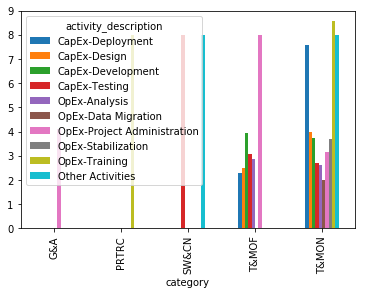

In [13]:
timesheet.groupby(['activity_description','category'],as_index = False).mean().pivot('category','activity_description','billed_hours').fillna(0).plot(kind='bar')


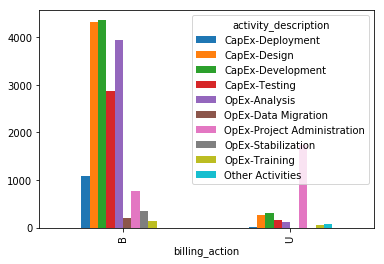

In [14]:
timesheet.groupby(['activity_description','billing_action'],as_index = False).sum().pivot('billing_action','activity_description','billed_hours').plot(kind='bar')
